# Running Decision Tree Model

In [1]:
import os
import pandas as pd
import math 
from collections import defaultdict 
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR="../data"

## Import preprocessed data

### Import input - indices.pickle

In [2]:
import pickle

In [3]:
with open(os.path.join(DATA_DIR, 'input_output_list.pickle'), 'rb') as f:
    a = pickle.load(f)

In [4]:
X = np.array([d[0] for d in a])
y = np.array([d[1] for d in a])

## Split data set into training and testing data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (32074, 450)
Testing set size: (10692, 450)


## Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [8]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [9]:
# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Make predictions and evaluate the model
predictions = clf.predict(X_test)

In [77]:
print(clf.tree_.node_count)
print(clf.get_n_leaves())
print(clf.get_depth())

35333
17667
58


#### Example Plot for presentation

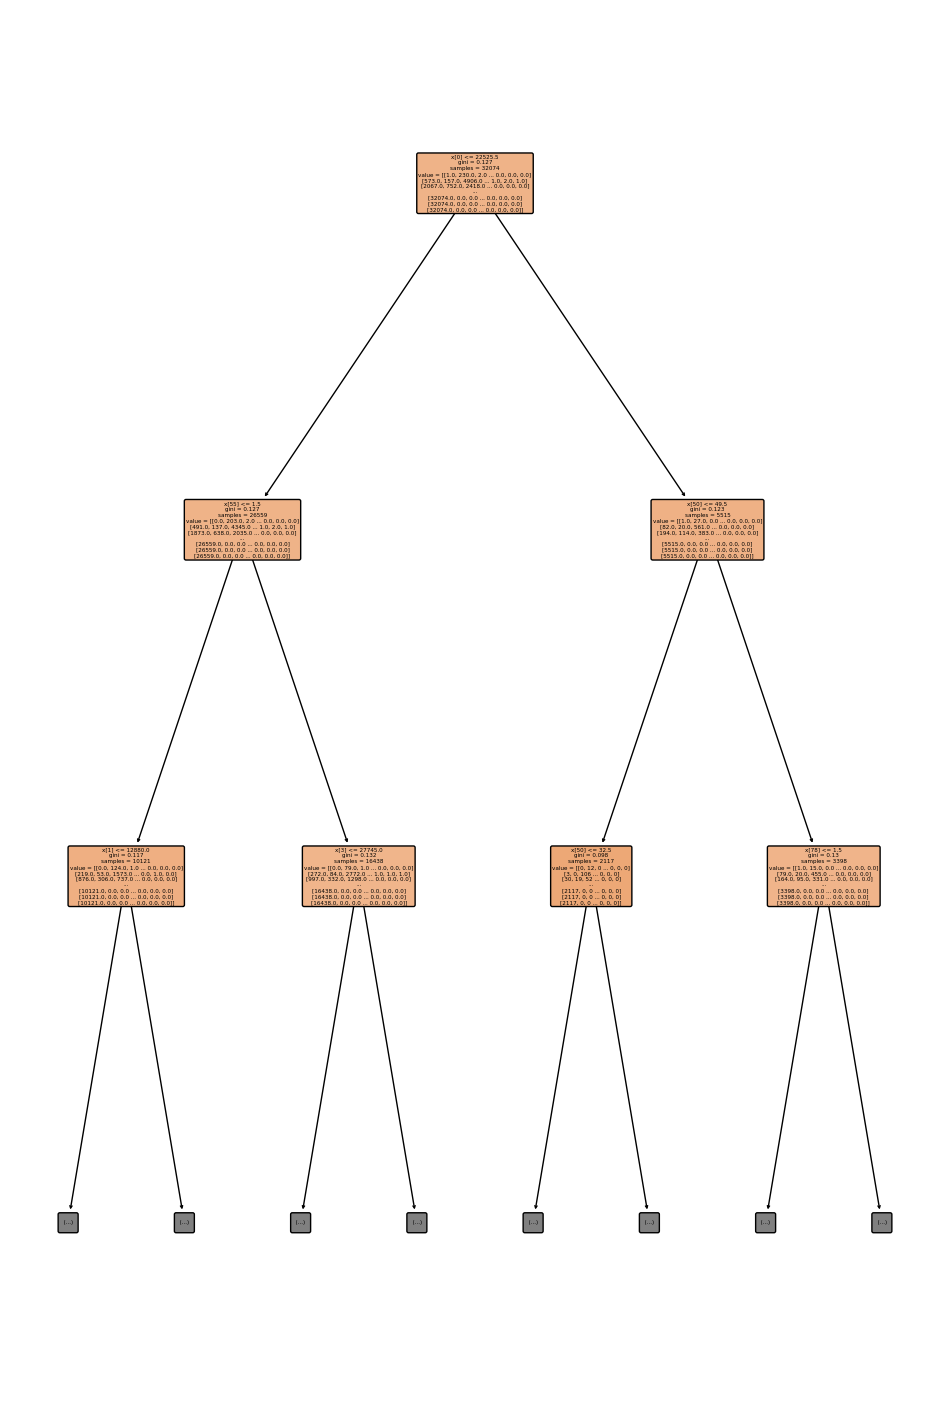

In [76]:
plt.figure(figsize=(12,18))  # Adjust the size to your needs
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          max_depth=2
          ,  # Adjust max_depth to show more or fewer levels of the tree
          #feature_names=X_train.columns, 
          class_names=True)

plt.show()

### Decode

In [18]:
import sentencepiece as spm
sp = spm.SentencePieceProcessor(model_file='curnames.model')

In [12]:
y_test_decoded = []
for row in y_test:
    # Decode each token in the row, skipping 0 and -1, and concatenate them
    decoded_row = ''.join(sp.decode(int(token)) for token in row if token not in [0, -1])
    # Append the decoded and concatenated string to the list
    y_test_decoded.append(decoded_row)
    

In [13]:
# Convert the list of decoded strings back into a NumPy array
y_test_decoded = np.array(y_test_decoded)
y_test_decoded[0:10]

array(['transposase', 'YccV-likedomain-containingF-boxprotein',
       'FAD-bindingand(Fe-S)-bindingdomain-containingprotein',
       '23SrRNAuridine-methyltransferase',
       'non-ribosomalpeptidesynthetase',
       'translationinitiationfactorIF-2',
       'LacIfamilyDNA-bindingtranscriptionalregulator',
       'potassium-transportingATPasesubunit',
       'signalrecognitionparticleprotein',
       'heterocycloanthracin/sonorensinfamilybacteriocin'], dtype='<U156')

In [14]:
predictions_decoded = []
for row in predictions:
    # Decode each token in the row, skipping 0 and -1, and concatenate them
    decoded_row = ''.join(sp.decode(int(token)) for token in row if token not in [0, -1])
    # Append the decoded and concatenated string to the list
    predictions_decoded.append(decoded_row)
    

In [15]:
# Convert the list of decoded strings back into a NumPy array
predictions_decoded = np.array(predictions_decoded)
predictions_decoded[0:10]

array(['SEC14familylipid-bindingprotein',
       'YccV-likedomain-containingF-boxprotein',
       'FAD-bindingand(Fe-S)-bindingdomain-containingprotein',
       'cytochromeoubiquinol/quinoloxidasesubunitIV',
       'M48familymetallopeptidase', 'translationinitiationfactorIF-2',
       'LacIfamilyDNA-bindingtranscriptionalregulator',
       'ADP-ribosylglycohydrolasefamilyprotein', 'FimVfamilyprotein',
       '2-methylaconitatecis-transisomerasePrpFfamilyprotein'],
      dtype='<U126')

In [16]:
#75% training, 25% testing, SuperFamily Only!
# Evaluate the model (e.g.: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_decoded, predictions_decoded)

print("Accuracy:", accuracy)

comparison_df = pd.DataFrame({'Actual': y_test_decoded, 'Predicted': predictions_decoded, 'Equal': predictions_decoded==y_test_decoded}).sort_values(by='Equal')
print(len(comparison_df), len(comparison_df[comparison_df["Equal"] == True]))
comparison_df.head(25)

#calculate_similarity_scores(predictions, actuals, threshold=similarity_threshold

Accuracy: 0.2991021324354658
10692 3198


,Actual,Predicted,Equal
0,transposase,SEC14familylipid-bindingprotein,False
6562,zincribbondomain-containingprotein,CPBPfamilyintramembraneglutamicendopeptidase,False
6560,putativehydro-lyase,YehRfamilylipoprotein,False
6558,bifunctionaldiguanylatecyclase/phosphodiesterase,GGDEFdomain-containingprotein,False
6557,antitoxin,TIGR02familyfamily,False
6556,argonautefamilyprotein,MaoCfamilydehydratase,False
6554,classIXmyosin,-family,False
6552,E3ubiquitin-proteinligase,RINGfingerprotein,False
6551,F-box/LRR-repeatprotein,F-boxprotein,False
6550,metallophosphoesterasefamilyprotein,metallophosphatase,False


In [19]:
comparison_df.to_csv('../data/outputTraining_v2.csv', sep='\t', index=False)

### Fuzzy Matching to evaluate results

Imported and modified from fuzzy_match_CurName.ipynb (CM)

In [11]:
import sys, os, json
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pandas as pd
from pathlib import Path
import Levenshtein

In [12]:
# Define a threshold for considering a prediction as correct
similarity_threshold = 80

def calculate_similarity_scores(predictions, actuals, threshold=similarity_threshold):
    correct_predictions = 0
    total_predictions = len(predictions)
    
    # Scores for different types of comparisons
    similarity_scores = []
    partial_scores = []
    token_sort_scores = []
    token_set_scores = []
    
    for predicted, actual in zip(predictions, actuals):
        # Convert to lower case for case-insensitive comparison
        predicted_lower = predicted.lower()
        actual_lower = actual.lower()
        
        # Calculate similarity score and other types of scores
        similarity = fuzz.ratio(predicted_lower, actual_lower)
        partial = fuzz.partial_ratio(predicted_lower, actual_lower)
        token_sort = fuzz.token_sort_ratio(predicted_lower, actual_lower)
        token_set = fuzz.token_set_ratio(predicted_lower, actual_lower)
        
        # Record the scores
        similarity_scores.append(similarity)
        partial_scores.append(partial)
        token_sort_scores.append(token_sort)
        token_set_scores.append(token_set)
        
        # Check if the similarity score is above the threshold
        if similarity >= threshold:
            correct_predictions += 1
    
    # Calculate adjusted accuracy
    adjusted_accuracy = correct_predictions / total_predictions
    
    return adjusted_accuracy, similarity_scores, partial_scores, token_sort_scores, token_set_scores

In [25]:
true_count = np.sum(row_by_row_equality)/len(row_by_row_equality)
false_count = len(row_by_row_equality) - true_count
# Calculate the ratio of True to False
ratio_true_to_false = true_count / false_count if false_count != 0 else 'Infinity'

print(f"Ratio of True to False: {ratio_true_to_false}")
print(f"Fully correct : {ratio_true_to_false}")

NameError: name 'row_by_row_equality' is not defined

In [26]:
# Calculate scores and adjusted accuracy
adjusted_accuracy, similarity_scores, partial_scores, token_sort_scores, token_set_scores = calculate_similarity_scores(predictions, y_test)

print(f"Adjusted Accuracy: {adjusted_accuracy*100:.2f}%")
print("Similarity Scores:", similarity_scores)
print("Partial Match Scores:", partial_scores)
print("Token Sort Scores:", token_sort_scores)
print("Token Set Scores:", token_set_scores)

NameError: name 'calculate_similarity_scores' is not defined

## Prediction of Uncurated

In [27]:
import gzip

In [28]:
with gzip.open(os.path.join(DATA_DIR, 'encoded_features_uncurated.pickle.gz'), 'rb') as f:
    UNcur_dict = pickle.load(f)

In [34]:
len(UNcur_dict['234922'])

462

In [35]:
len(UNcur_dict)

173287

In [45]:
UNcur_pred = []
df_UNcur_pred = []
for key, value in UNcur_dict.items():
    #some len(UNcur_dict['234922']) == 462
    if (len(UNcur_dict[str(key)]) == 450):
        pred_wArchId = clf.predict(np.array([UNcur_dict[str(key)]]))
        decoded_pred = ''.join(sp.decode(int(token)) for token in pred_wArchId[0] if token not in [0, -1])
        # Append the key and prediction to the DataFrame
        UNcur_pred.append({'ArchId': key, 'prediction1': decoded_pred})

df_UNcur_pred = pd.DataFrame(UNcur_pred)

In [46]:
df_UNcur_pred.shape

(173268, 2)

In [52]:
len(df_UNcur_pred[df_UNcur_pred['prediction1']=='-family'])

24593

In [59]:
df_UNcur_pred

,ArchId,prediction1
0,48,-family
1,39,-family
2,28,-family
3,52,-family
4,35,-family
...,...,...
173263,18386111,PTSascorbatetransportersubunit
173264,18386208,importin-betaN-terminaldomain-containingprotein
173265,18386403,cyclin-dependentkinasesregulatorysubunit
173266,18387476,CHASE2andHATPasecdomain-containingprotein


#### Comparison with pre-curated

In [60]:
with open(os.path.join(DATA_DIR, 'encoded_outputs_uncurated.pickle'), 'rb') as f:
    UNcur_dict_output = pickle.load(f)

In [61]:
len(UNcur_dict_output)

173287

In [62]:
UNcur_output = []
df_UNcur_output = []
for key, value in UNcur_dict_output.items():
    #some len(UNcur_dict['234922']) == 462
    decoded_UNcur_output = ''.join(sp.decode(int(token)) for token in value if token not in [0, -1])
    # Append the key and prediction to the DataFrame
    UNcur_output.append({'ArchId': key, 'UNcur_output': decoded_UNcur_output})

df_UNcur_output = pd.DataFrame(UNcur_output)

In [63]:
df_UNcur_output

,ArchId,UNcur_output
0,48,Gagp24domain-containingprotein
1,39,Gagp17domain-containingprotein
2,28,RibosomalS18domain-containingprotein
3,52,VPRdomain-containingprotein
4,35,TOPRIMdomain-containingprotein
...,...,...
173282,18386111,Haemaggactdomain-containingprotein
173283,18386208,importin-betaN-terminaldomain-containingprotein
173284,18386403,S53familypeptidaseS8/S53familypeptidase
173285,18387476,


In [65]:
merged_df = pd.merge(df_UNcur_pred, df_UNcur_output, on='ArchId', how='inner')

In [71]:
len(merged_df[merged_df['prediction1']==merged_df['UNcur_output']])

7289

In [76]:
test = clf.predict(np.array([uncur[str(key)]]))
test

array([[   9, 1545,    7,    4,    6,    3,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]])

In [77]:
y_test_decoded = []
for row in test:
    # Decode each token in the row, skipping 0 and -1, and concatenate them
    decoded_row = ''.join(sp.decode(int(token)) for token in row if token not in [0, -1])
    # Append the decoded and concatenated string to the list
    y_test_decoded.append(decoded_row)
y_test_decoded

['transglutaminasedomain-containingprotein']

In [57]:
for i, (key, value) in enumerate(uncur.items()):
    print(f"Key: {key}")
    print(f"Value: {value}\n")
    
    # Stop after printing 20 examples
    if i == 19:
        break

Key: 48
Value: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [39]:
X_pred = np.array([d for d in uncur])

In [58]:
print("Keys:", list(uncur.values()))

Keys: 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Prediction results

#### One_hot_encoding with SuperFamily Only 

In [81]:
#75% training, 25% testing, SuperFamily Only!
# Evaluate the model (e.g.: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Equal': predictions==y_test}).sort_values(by='Equal')
print(len(comparison_df), len(comparison_df[comparison_df["Equal"] == True]))
comparison_df.head(25)

Accuracy: 0.39834416264933975
9542 3801


,Actual,Predicted,Equal
7294,CPBP family intramembrane glutamic endopeptidase,lysostaphin resistance A-like protein,False
11361,DUF4059 family protein,MFS transporter,False
27603,radical SAM protein,MFS transporter,False
1794,acyltransferase family protein,ACP S-malonyltransferase,False
8671,dihydroorotase,amidohydrolase,False
24411,p-aminobenzoyl-glutamate transporter,anaerobic C4-dicarboxylate transporter,False
22878,NAD-dependent DNA ligase LigB,ATP-dependent DNA ligase,False
32867,TatD family hydrolase,MFS transporter,False
5508,cadherin repeat domain-containing protein,MFS transporter,False
36900,xanthine dehydrogenase FAD-binding subunit XdhB,MFS transporter,False


In [7]:
print(comparison_df['Predicted'].value_counts())
print(y_train.value_counts())

NameError: name 'comparison_df' is not defined

In [ ]:
print(clf.tree_.node_count)
print(clf.get_n_leaves())
print(clf.get_depth())

In [ ]:
# Calculate scores and adjusted accuracy
adjusted_accuracy, similarity_scores, partial_scores, token_sort_scores, token_set_scores = calculate_similarity_scores(predictions, y_test)

print(f"Adjusted Accuracy: {adjusted_accuracy*100:.2f}%")
print("Similarity Scores:", similarity_scores)
print("Partial Match Scores:", partial_scores)
print("Token Sort Scores:", token_sort_scores)
print("Token Set Scores:", token_set_scores)

#### Too small training set, One hot encoded specArch and super fam

In [42]:
#25% training
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Equal': predictions==y_test}).sort_values(by='Equal')
print(len(comparison_df), len(comparison_df[comparison_df["Equal"] == True]))
comparison_df.head(15)

28626 8033


,Actual,Predicted,Equal
26528,prefoldin subunit alpha,prefoldin subunit,False
11399,DUF4125 family protein,transposase,False
6061,CDK5RAP3 family protein,transposase,False
12685,electron transfer flavoprotein subunit,transposase,False
33432,thiosulfate reductase PhsA,transposase,False
17461,Homer/Vesl family protein,Homer protein homolog,False
26130,pol protein pepsin-like aspartate protease and...,pol protein,False
14410,flagellin,transposase,False
15105,gelsolin-like protein,gelsolin/scinderin family protein,False
16747,HAMP domain-containing histidine kinase,sensor histidine kinase,False


In [62]:
print(comparison_df['Predicted'].value_counts())
print('\nLabel "transposase" in training: ', len(y_train[y_train=='transposase']))

Predicted
transposase                                                 13076
SDR family oxidoreductase                                     327
serine/threonine-protein kinase                               306
RNA-binding protein                                           289
hybrid sensor histidine kinase/response regulator             275
                                                            ...  
lipase family protein                                           1
EAL domain-containing response regulator                        1
retropepsin-like aspartic protease/reverse transcriptase        1
terpene synthase family protein                                 1
hypermethylated in cancer protein                               1
Name: count, Length: 1127, dtype: int64

Label "transposase" in training:  58


In [78]:
print(clf.tree_.node_count)
print(clf.get_n_leaves())
print(clf.get_depth())

4063
2032
1329


In [32]:
row_by_row_equality = np.all(y_test == predictions, axis=1)

## Support Vector Machine (SVM)

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

In [86]:
# Initialize the SVM classifier
svm_clf = SVC(random_state=42)

In [ ]:
# Fit the model on the training data
svm_clf.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
predictions = svm_clf.predict(X_test[1])

In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
accuracy

0.032

In [ ]:
# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10],  # Example parameter: Regularization strength
    'kernel': ['linear', 'rbf'],  # Example parameter: Type of SVM kernel
    # Add other parameters here if needed
}

In [ ]:
# Set n_jobs=-1 to use all available CPUs for parallelizing the search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, n_jobs=-1, verbose=1)


In [ ]:
grid_search.fit(X_train, y_train_encoded)

In [ ]:
best_svc = grid_search.best_estimator_

In [ ]:
predictions = best_svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test_encoded, predictions)

In [ ]:
print("Best SVC Parameters:", grid_search.best_params_)
print("SVM Accuracy with Best Parameters:", accuracy)

## Principal Component Analysis

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
# standardize features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
# Initialize PCA - for example, to reduce the dataset to 2 principal components
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# The number of components PCA chose to keep
print("Number of components chosen:", pca.n_components_)

In [ ]:
#now re-run PCA or SVM with reduced dimensions!